In [ ]:
import pandas as pd
import io
df = pd.read_csv("titanic_dataset - Copy.csv")
print("--- first 5 Rows ---")
print(df.head())
print("\n---Data info ---")
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())
print("\n--- Missing Value ---")
print(df.isnull().sum())

--- first 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df=df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
df['FamilySize']=df['SibSp']+df['Parch']+1
df=df.drop(['SibSp','Parch'],axis=1)
df['Sex']=df['Sex'].map({'male':0,'female':1})
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)
print(" - - - Data Preprocessing Complete - - -")

 - - - Data Preprocessing Complete - - -


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=df.drop('Survived',axis=1)
y=df['Survived']
print("-- Final Features (Head) ---")
print(X.head())
feature_names=X.columns.tolist()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
print("\n---Model training Complete--")


-- Final Features (Head) ---
   Pclass  Sex   Age     Fare  FamilySize  Embarked_Q  Embarked_S
0       3    0  22.0   7.2500           2       False        True
1       1    1  38.0  71.2833           2       False       False
2       3    1  26.0   7.9250           1       False        True
3       1    1  35.0  53.1000           2       False        True
4       3    0  35.0   8.0500           1       False        True

---Model training Complete--


--- 1. Accuracy Score ---
Accuracy: 0.8156(or81.56%)

--- 2. Classification Report ---
                    precision    recall  f1-score   support

Did Not Survive(0)       0.83      0.86      0.85       105
       Survived(1)       0.79      0.76      0.77        74

          accuracy                           0.82       179
         macro avg       0.81      0.81      0.81       179
      weighted avg       0.81      0.82      0.82       179


--- 3. Confusion Matrix(and plot) ---
Confusion Matrix(Raw Data):
[[90 15]
 [18 56]]

 Heatmap of the confusion matrix has been saved as'confusion_matrix_heatmap.png' 

--- 4. Learning curves(and plot) 

Learning curves plot has been saved as 'learning_curves.png'


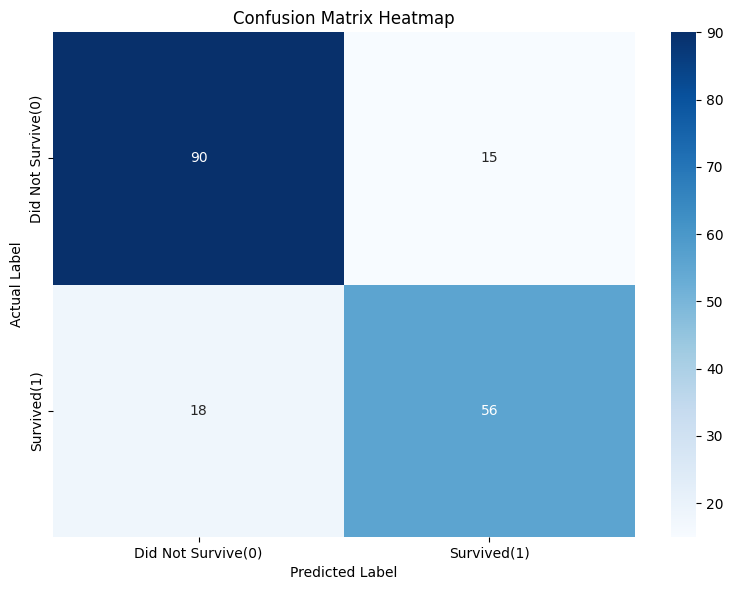

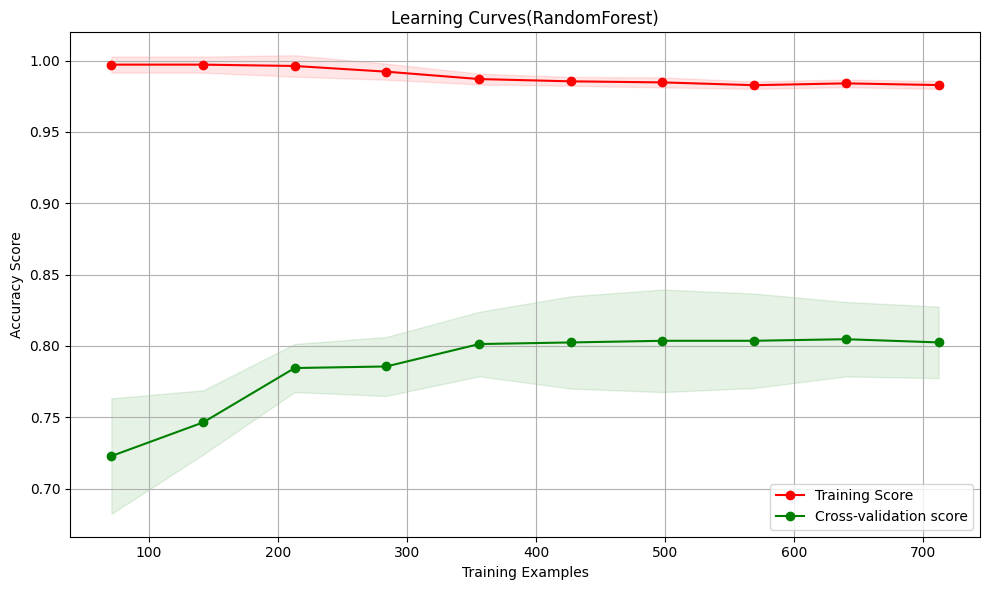

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import learning_curve
import numpy as np
y_pred = model.predict(X_test)
print("--- 1. Accuracy Score ---")
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}(or{accuracy*100:.2f}%)")
print("\n--- 2. Classification Report ---")
report=classification_report(y_test,y_pred,target_names=['Did Not Survive(0)','Survived(1)'])
print(report)
print("\n--- 3. Confusion Matrix(and plot) ---")
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix(Raw Data):")
print(conf_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Did Not Survive(0)','Survived(1)'],yticklabels=['Did Not Survive(0)','Survived(1)'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.savefig('confusion_matrix_heatmap.png')
print("\n Heatmap of the confusion matrix has been saved as'confusion_matrix_heatmap.png' ")
print("\n--- 4. Learning curves(and plot) ")
train_sizes,train_scores,validation_scores=learning_curve(
    estimator=RandomForestClassifier(n_estimators=100,random_state=42),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
validation_scores_mean=np.mean(validation_scores,axis=1)
validation_scores_std=np.std(validation_scores,axis=1)
plt.figure(figsize=(10,6))
plt.title('Learning Curves(RandomForest)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.grid()
plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color="r")
plt.fill_between(train_sizes,validation_scores_mean-validation_scores_std,validation_scores_mean+validation_scores_std,alpha=0.1,color="g")
plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training Score")
plt.plot(train_sizes,validation_scores_mean,'o-',color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('learning_curves.png')
print("\nLearning curves plot has been saved as 'learning_curves.png'")